In [3]:
from quality import Hardness, list_files_in_directory
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [7]:
csv_files = list_files_in_directory('data/optimize/config')

num_datasets = len(csv_files)


# Determine the grid size (rows and columns) for subplots
rows = int(np.ceil(np.sqrt(num_datasets)))  # Number of rows
cols = int(np.ceil(num_datasets / rows))   # Number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(200, 150))
axes = axes.flatten()  # Flatten the axes for easy iteration

csv_objects = [Hardness(file).isolation_hardness() for file in csv_files]
# Plot each dataset
for i, (dataset_name, anomaly_scores) in enumerate(zip(csv_files, csv_objects)):
    ax = axes[i]
    ax.hist(anomaly_scores, bins=20, color='skyblue', edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', label='Anomaly Threshold (0)')
    ax.set_title(dataset_name)
    ax.set_xlabel('Anomaly Score')
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide any unused subplots
for j in range(len(csv_files), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

DATA(cols=COLS(names=['MRE-', 'ACC+', 'PRED40+', 'N_estimators', 'criterion', 'Min_sample_leaves', 'Min_impurity_decrease', 'Max_depth'], all=[NUM(n=10000, at=0, txt='MRE-', mu=82.32180299999965, m2=1549924.3379919105, sd=12.450218254819886, lo=50.26, hi=100, goal=0), NUM(n=10000, at=1, txt='ACC+', mu=5.151613999999989, m2=145571.66035004015, sd=3.8155762208601907, lo=-16.92, hi=35.05, goal=1), NUM(n=10000, at=2, txt='PRED40+', mu=22.097500000000014, m2=1830129.9375000002, sd=13.52890597497403, lo=0, hi=37.5, goal=1), NUM(n=10000, at=3, txt='N_estimators', mu=106.06099999999988, m2=32638142.790000062, sd=57.13265872571758, lo=10, hi=200, goal=1), SYM(n=10000, at=4, txt='criterion', has={'squared_error': 3363, 'absolute_error': 3302, 'poisson': 3335}, mode='squared_error', most=3363), NUM(n=10000, at=5, txt='Min_sample_leaves', mu=10.479600000000017, m2=333961.8383999997, sd=5.7792321109624245, lo=1, hi=20, goal=1), NUM(n=10000, at=6, txt='Min_impurity_decrease', mu=4.996174999999974, m

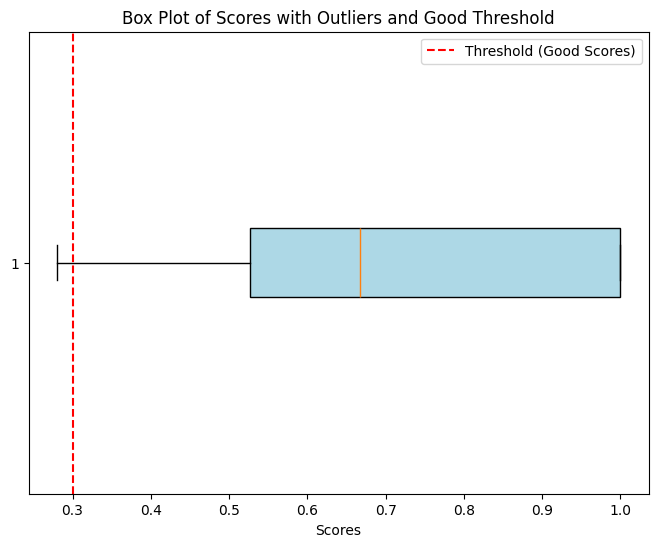

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ezr import *

# Input: List of scores
d = DATA().adds(csv('data/optimize/hpo/healthCloseIsses12mths0001-hard.csv'))
print(d)
d.chebyshevs()
scores = [d.chebyshev(r) for r in d.rows]
print(scores)

# Define a threshold for "good" scores
threshold = 0.3

# Compute metrics
mean_all = np.mean(scores)
good_scores = [score for score in scores if score <= threshold]
mean_good = np.mean(good_scores) if good_scores else np.nan
deviation = abs(mean_good - mean_all) if good_scores else np.nan

# Identify outliers
q1, q3 = np.percentile(scores, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [score for score in scores if score < lower_bound or score > upper_bound]

# Print results
print(f"Mean of all scores: {mean_all:.2f}")
print(f"Mean of good scores: {mean_good:.2f}")
print(f"Deviation of good scores from mean: {deviation:.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Outliers: {outliers}")

# Visualization: Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(scores, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.axvline(threshold, color="red", linestyle="--", label="Threshold (Good Scores)")
plt.xlabel("Scores")
plt.title("Box Plot of Scores with Outliers and Good Threshold")
plt.legend()
plt.show()


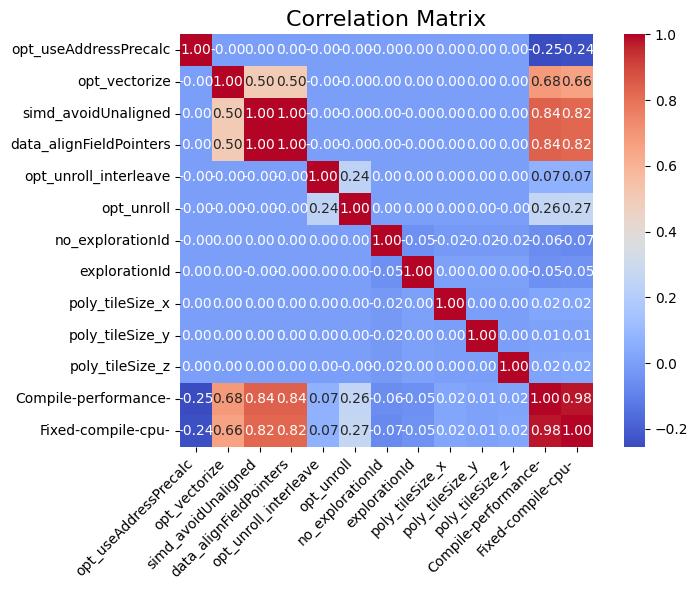

In [4]:
df = pd.read_csv('data/optimize/config/SS-X.csv')
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

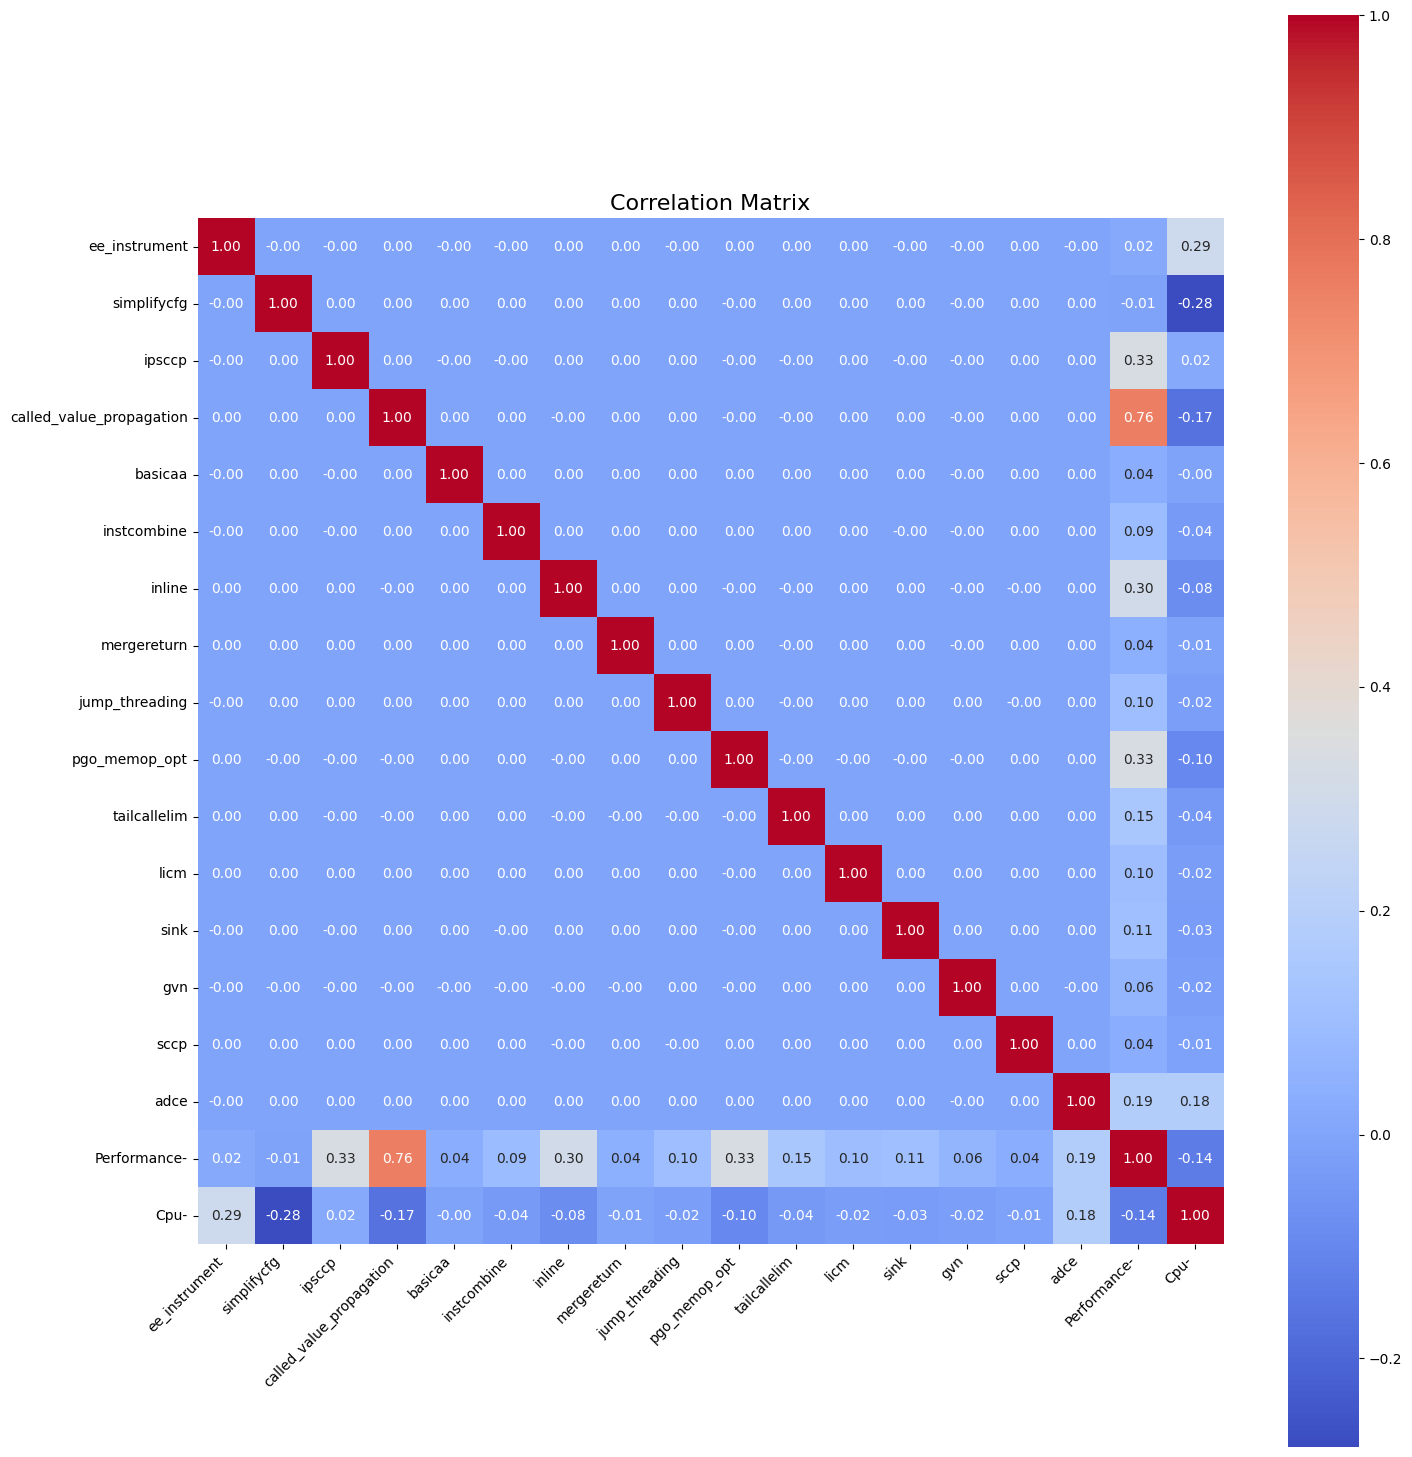

In [6]:
df = pd.read_csv('data/optimize/config/SS-W.csv')
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

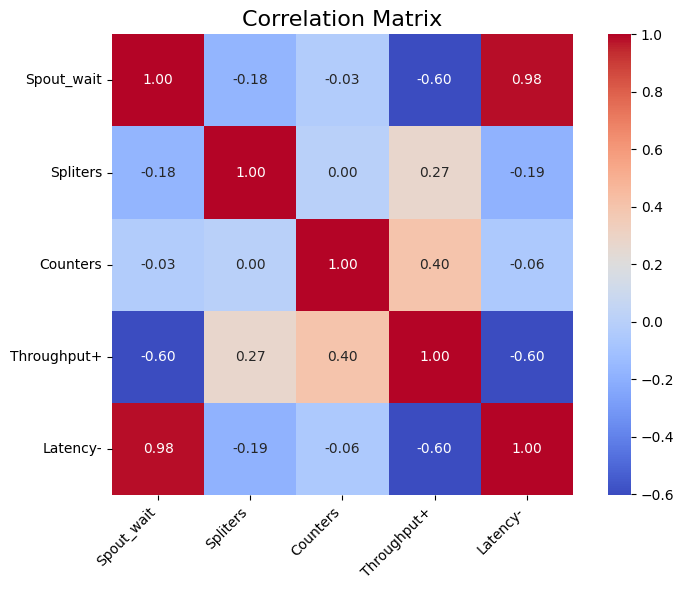

In [8]:
df = pd.read_csv('data/optimize/config/SS-A.csv')
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

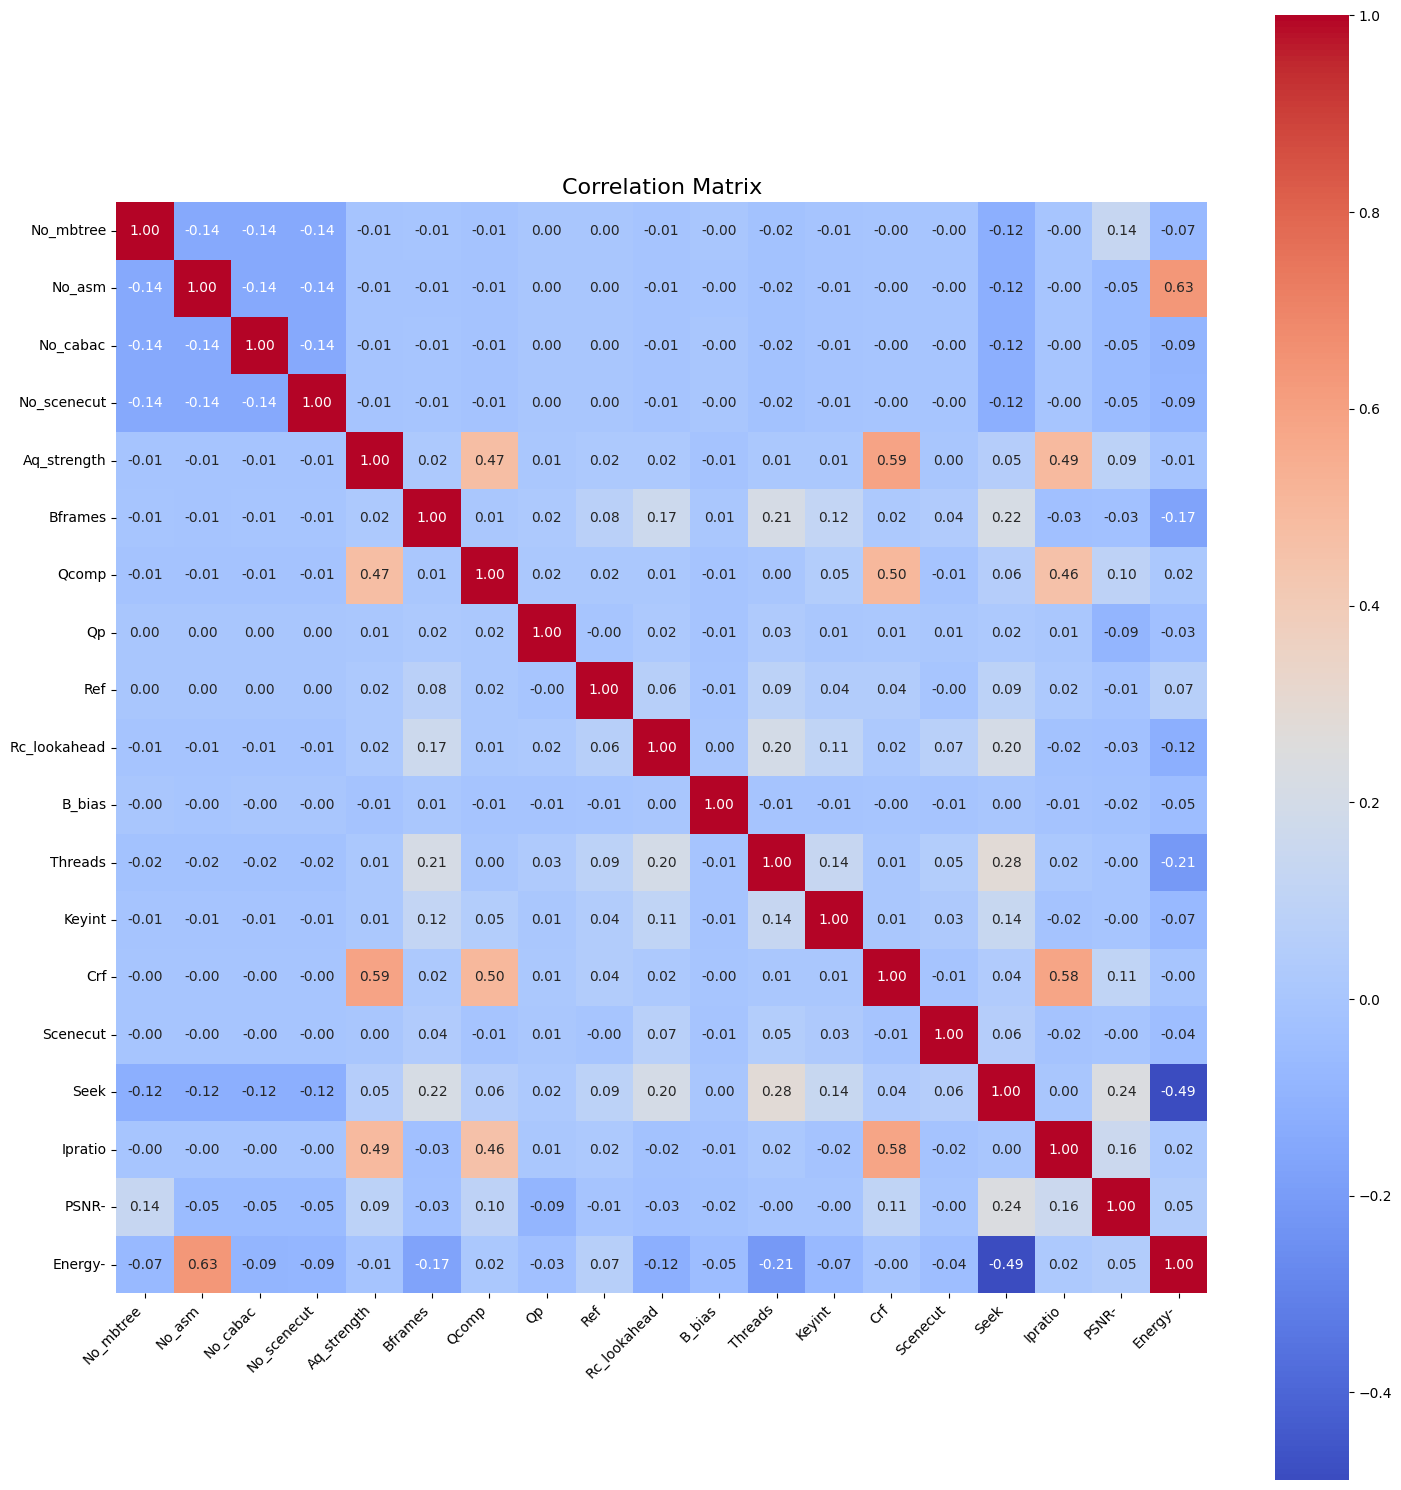

In [10]:
df = pd.read_csv('data/optimize/config/SS-N.csv')

correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

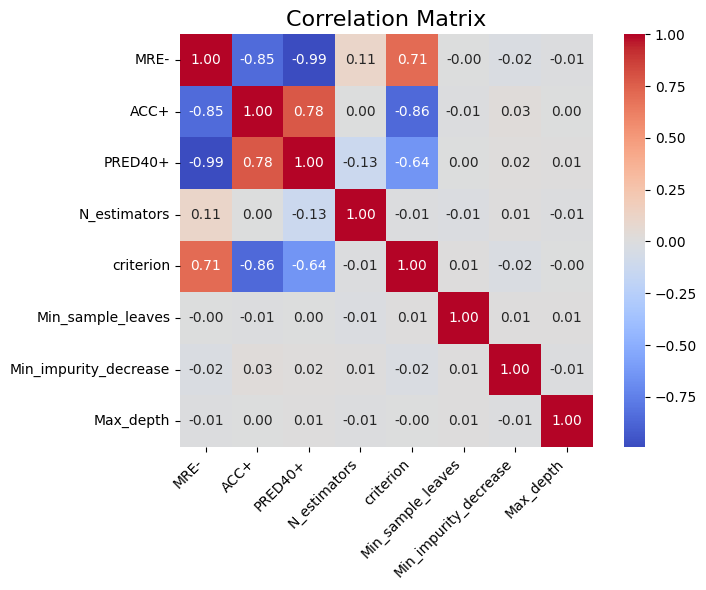

In [13]:
df = pd.read_csv('data/optimize/hpo/healthCloseIsses12mths0011-easy.csv')
df['criterion'] = df['criterion'].astype('category').cat.codes
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/2976840347.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


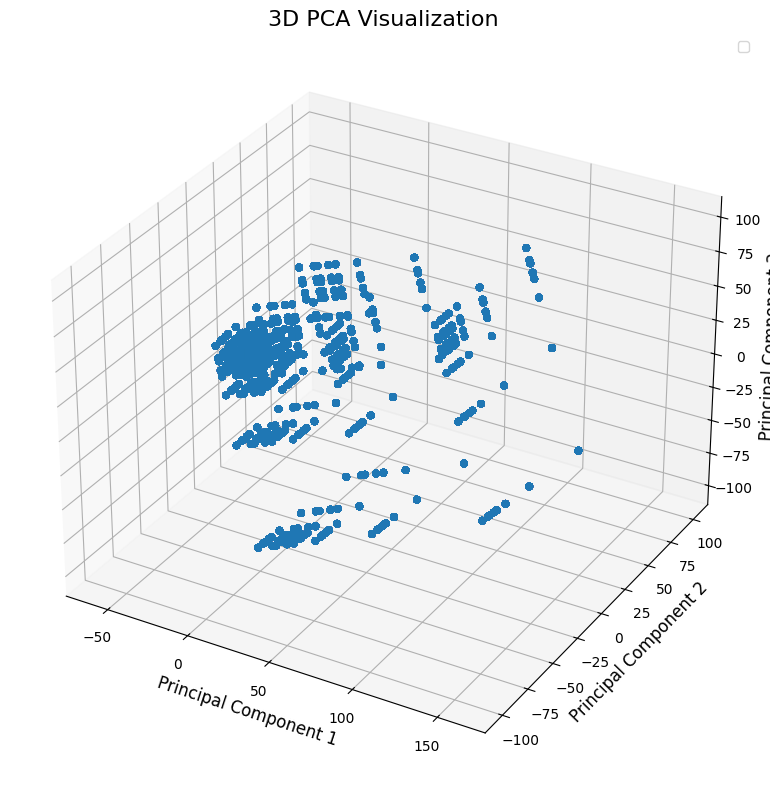

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/config/SS-X.csv')

# Separate features and labels
features = df.drop(columns = ['Compile-performance-','Fixed-compile-cpu-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_55943/1148571963.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


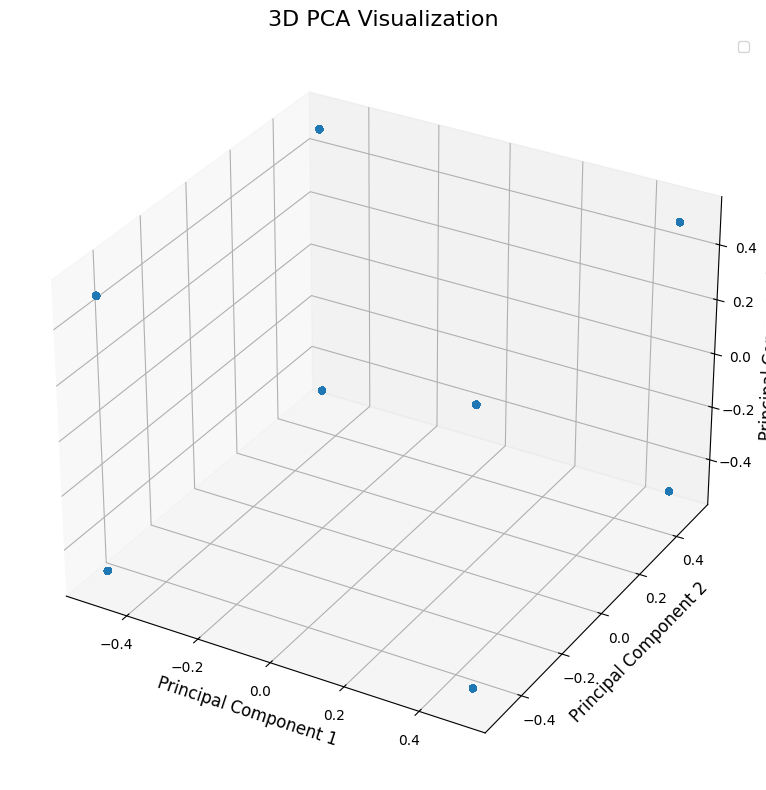

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/config/SS-W.csv')

# Separate features and labels
features = df.drop(columns = ['Performance-','Cpu-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/288887020.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


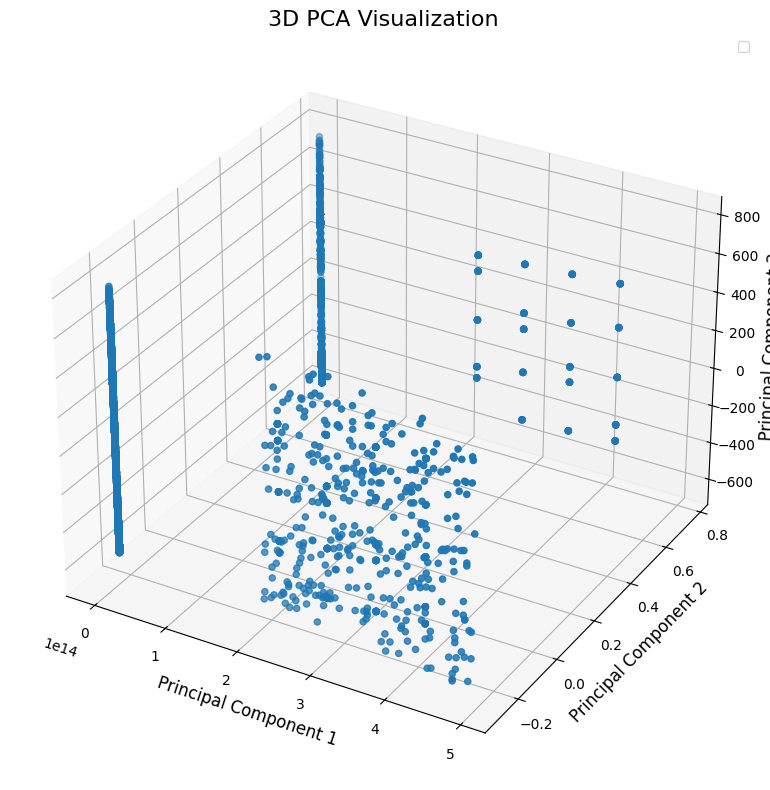

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/config/SS-N.csv')

# Separate features and labels
features = df.drop(columns = ['PSNR-','Energy-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/3846104912.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


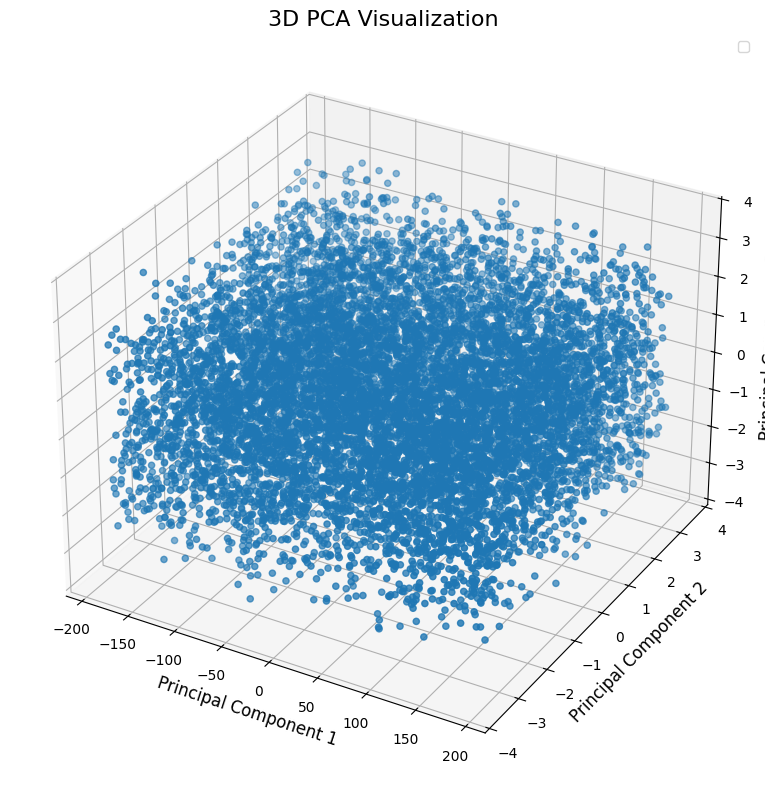

In [18]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/process/xomo_ground.csv')

# Separate features and labels
features = df.drop(columns = [' EFFORT-',' MONTHS-',' DEFECTS-',' RISKS-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/2347525865.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


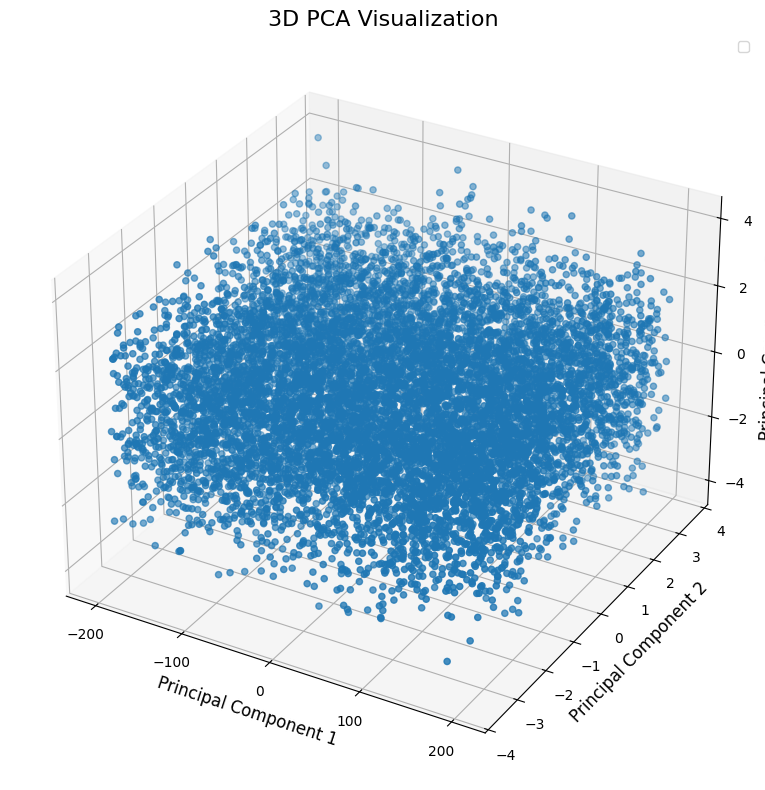

In [19]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/process/xomo_flight.csv')

# Separate features and labels
features = df.drop(columns = [' EFFORT-',' MONTHS-',' DEFECTS-',' RISKS-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/4249159171.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


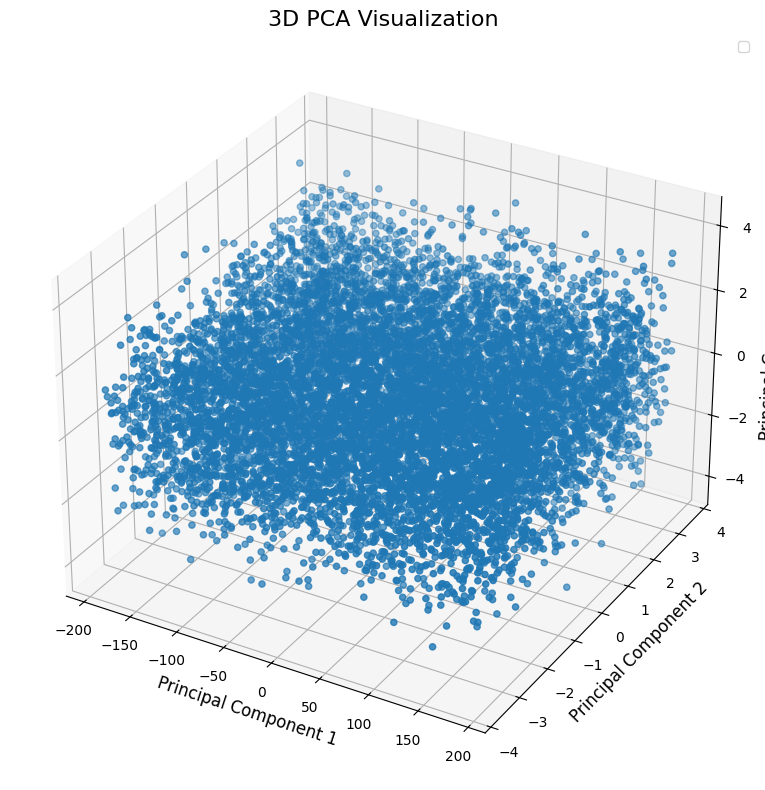

In [20]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/process/xomo_osp.csv')

# Separate features and labels
features = df.drop(columns = [' EFFORT-',' MONTHS-',' DEFECTS-',' RISKS-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/3487603288.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


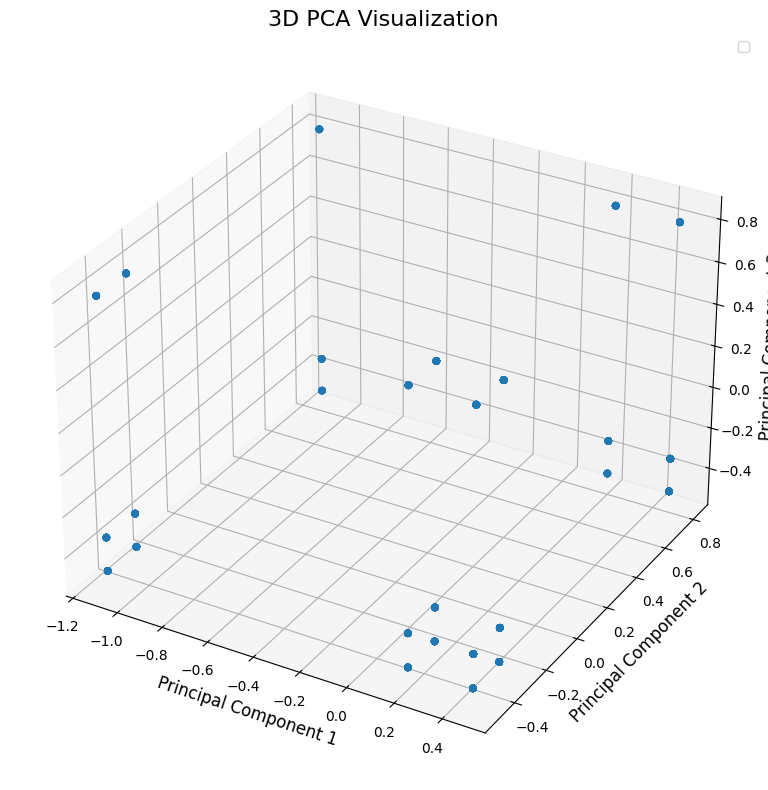

In [21]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/config/SS-M.csv')

# Separate features and labels
features = df.drop(columns = ['Benchmark-energy-','Benchmark-time-','Benchmark-cpu-'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/3715464102.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


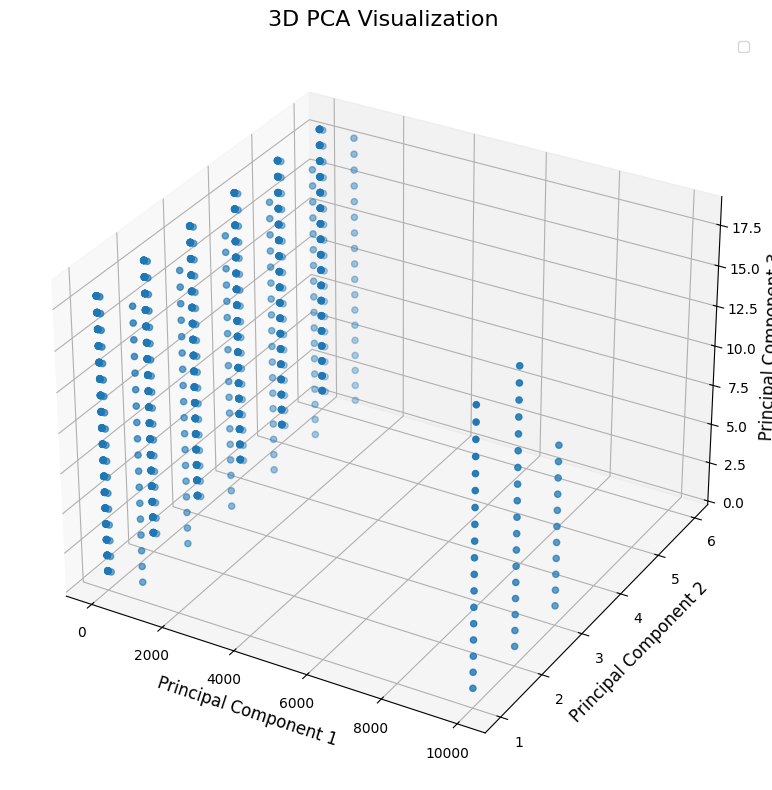

In [23]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/config/SS-A.csv')

# Separate features and labels
features = df.drop(columns = ['Throughput+','Latency-'])


# Perform PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(features)

# # Create a DataFrame for the reduced dimensions
# pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['Spout_wait'], df['Spliters'], df['Counters'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/2507970709.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


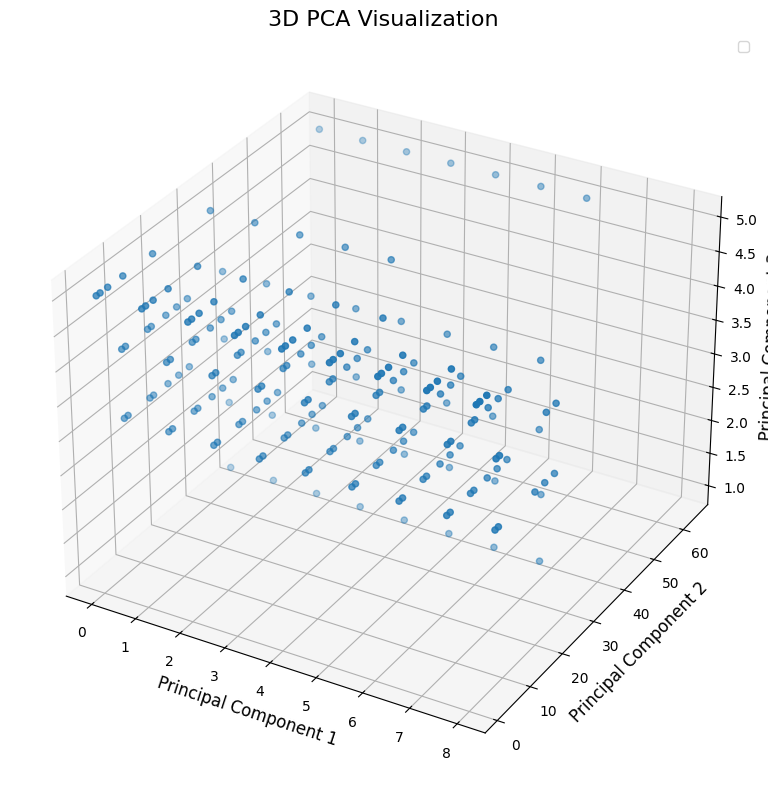

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/config/SS-B.csv')

# Separate features and labels
features = df.drop(columns = ['A-','B-'])


# Perform PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(features)

# # Create a DataFrame for the reduced dimensions
# pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['A'], df['B'], df['C'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/2990485906.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


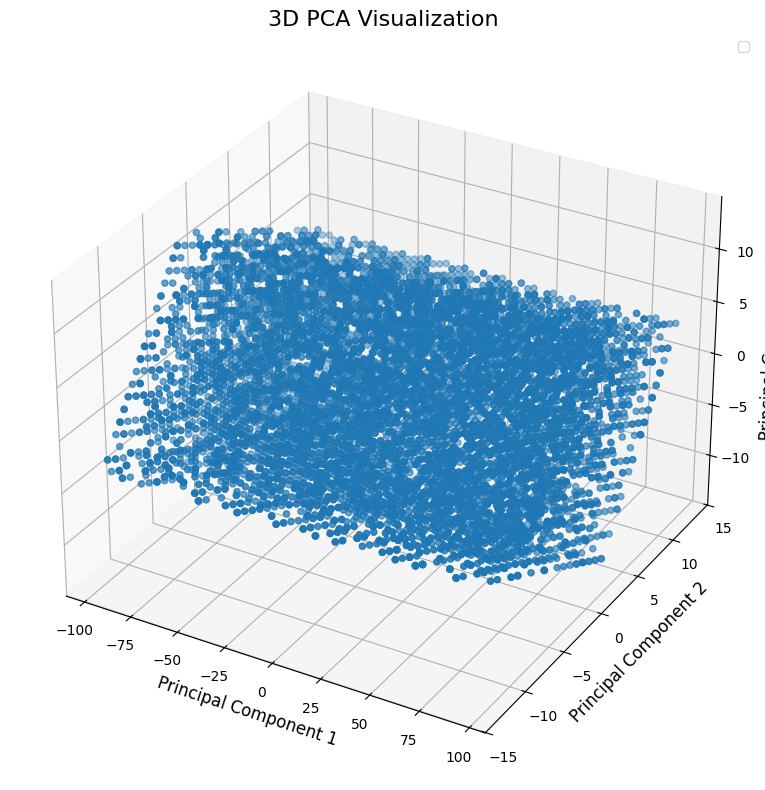

In [26]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/hpo/healthCloseIsses12mths0001-hard.csv')
df['criterion'] = df['criterion'].astype('category').cat.codes
# Separate features and labels
features = df.drop(columns = ['MRE-','ACC+','PRED40+'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_55943/1926171159.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


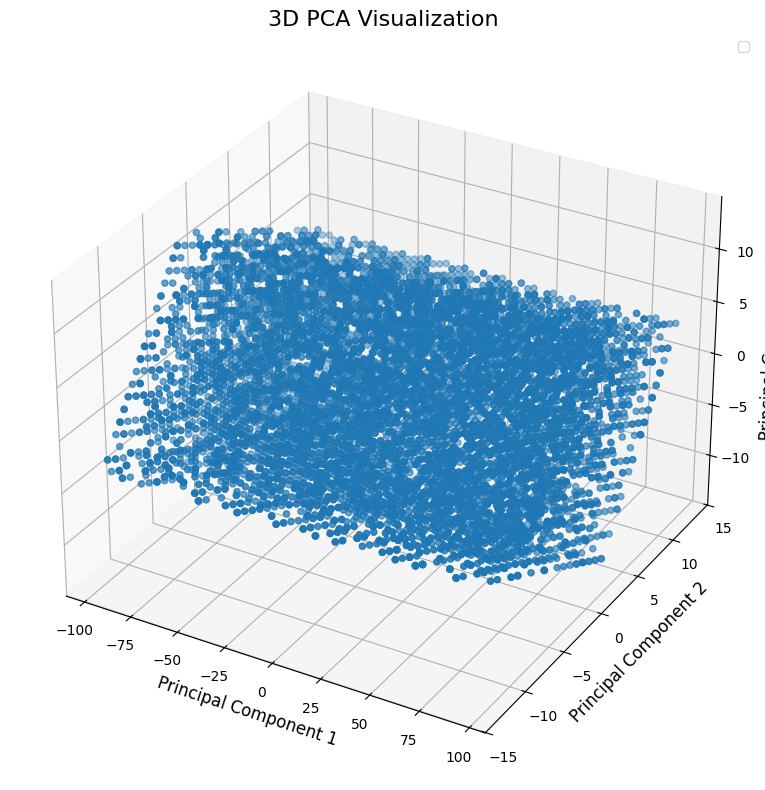

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data/optimize/hpo/healthCloseIsses12mths0011-easy.csv')
df['criterion'] = df['criterion'].astype('category').cat.codes
# Separate features and labels
features = df.drop(columns = ['MRE-','ACC+','PRED40+'])


# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Customize plot
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [14]:
from ezr import * 
import os

path = 'data/optimize/config'
csv_files = []
for root, dir, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))



csv_files.remove('data/optimize/config/SQL_AllMeasurements.csv')

intra_cluster_widths = {}
inter_cluster_widths = {}

for csv_file in csv_files:
    print(csv_file)
    d = DATA().adds(csv(csv_file))
    if len(d.rows) > 5000:
        stop = 5
    elif len(d.rows) > 3000: 
        stop = 4
    else: stop = 3
    cluster = d.cluster(d.rows, stop = stop, sortp= True)
    intra_cur = []
    for node, leafp in cluster.nodes():
        if leafp:
            intra_cur.append(d.dist(node.left, node.right))
    
    intra_cluster_widths[csv_file] = intra_cur

print(intra_cluster_widths)




data/optimize/config/SS-G.csv
data/optimize/config/SS-A.csv


data/optimize/config/wc-6d-c1-obj1.csv
data/optimize/config/SS-S.csv
data/optimize/config/wc+rs-3d-c4-obj1.csv
data/optimize/config/SS-C.csv
data/optimize/config/wc+wc-3d-c4-obj1.csv
data/optimize/config/SS-T.csv
data/optimize/config/SS-Q.csv
data/optimize/config/SS-M.csv
data/optimize/config/SS-K.csv
data/optimize/config/rs-6d-c3_obj2.csv
data/optimize/config/SS-V.csv
data/optimize/config/Apache_AllMeasurements.csv
data/optimize/config/wc+sol-3d-c4-obj1.csv
data/optimize/config/sol-6d-c2-obj1.csv
data/optimize/config/SS-W.csv
data/optimize/config/SS-X.csv
data/optimize/config/HSMGP_num.csv
data/optimize/config/SS-L.csv
data/optimize/config/SS-D.csv
data/optimize/config/SS-P.csv
data/optimize/config/SS-J.csv
data/optimize/config/SS-U.csv
data/optimize/config/SS-R.csv
data/optimize/config/X264_AllMeasurements.csv
data/optimize/config/SS-E.csv
data/optimize/config/rs-6d-c3_obj1.csv
data/optimize/config/SS-H.csv
data/optimize/config/SS-O.csv
data/optimize/config/SS-N.csv
data/optimize/con

In [24]:
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
import pandas as pd

# Function to calculate the leftmost and rightmost points of a cluster
def get_cluster_diameter(cluster_points):
    if len(cluster_points) < 2:
        return 0  # A single point has no diameter

    leftmost = min(cluster_points, key=lambda p: p[0])  # Based on the x-coordinate
    rightmost = max(cluster_points, key=lambda p: p[0])  # Based on the x-coordinate

    return euclidean(leftmost, rightmost)

# Function to calculate inter-cluster distances (diameters) and intra-cluster distances (centroid distances)
def compute_cluster_distances(data, n_clusters):
    # Perform KMeans clustering to assign labels
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Group points by clusters
    unique_labels = np.unique(labels)
    cluster_points = {label: data[labels == label] for label in unique_labels}

    # Inter-cluster distances (diameter of each cluster)
    inter_cluster_distances = {
        label: get_cluster_diameter(points)
        for label, points in cluster_points.items()
    }

    # Intra-cluster distances (distance between centroids)
    centroids = kmeans.cluster_centers_
    intra_cluster_distances = {}
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):  # Avoid duplicates and self-comparison
            pair = (i, j)
            distance = euclidean(centroids[i], centroids[j])
            intra_cluster_distances[pair] = distance

    return inter_cluster_distances, intra_cluster_distances


data = pd.read_csv('data/optimize/config/SS-X.csv')
data = data.drop(columns = ['Compile-performance-','Fixed-compile-cpu-']).values

n_clusters = 30  # Specify the number of clusters
inter_distances, intra_distances = compute_cluster_distances(data, n_clusters)

print("Inter-cluster Distances (Cluster Diameters):")
for cluster, distance in inter_distances.items():
    print(f"Cluster {cluster}: {distance:.2f}")

print("\nIntra-cluster Distances (Centroid Distances):")
for pair, distance in intra_distances.items():
    print(f"Clusters {pair}: {distance:.2f}")


Inter-cluster Distances (Cluster Diameters):
Cluster 0: 1.00
Cluster 1: 1.00
Cluster 2: 1.00
Cluster 3: 1.00
Cluster 4: 1.00
Cluster 5: 1.00
Cluster 6: 1.00
Cluster 7: 1.00
Cluster 8: 1.00
Cluster 9: 1.00
Cluster 10: 1.00
Cluster 11: 1.00
Cluster 12: 1.00
Cluster 13: 1.00
Cluster 14: 1.00
Cluster 15: 1.00
Cluster 16: 1.00
Cluster 17: 1.00
Cluster 18: 1.00
Cluster 19: 1.00
Cluster 20: 1.00
Cluster 21: 1.00
Cluster 22: 1.00
Cluster 23: 1.00
Cluster 24: 1.00
Cluster 25: 1.00
Cluster 26: 1.00
Cluster 27: 1.00
Cluster 28: 1.00
Cluster 29: 1.00

Intra-cluster Distances (Centroid Distances):
Clusters (0, 1): 110.51
Clusters (0, 2): 115.63
Clusters (0, 3): 109.40
Clusters (0, 4): 110.75
Clusters (0, 5): 48.63
Clusters (0, 6): 162.31
Clusters (0, 7): 53.39
Clusters (0, 8): 99.08
Clusters (0, 9): 22.29
Clusters (0, 10): 17.78
Clusters (0, 11): 123.15
Clusters (0, 12): 57.96
Clusters (0, 13): 35.00
Clusters (0, 14): 150.81
Clusters (0, 15): 68.48
Clusters (0, 16): 148.12
Clusters (0, 17): 121.96


In [20]:
data = pd.read_csv('data/optimize/config/SS-B.csv')
data = data.drop(columns = ['A-','B-']).values

n_clusters = 30  # Specify the number of clusters
inter_distances, intra_distances = compute_cluster_distances(data, n_clusters)

print("Inter-cluster Distances (Cluster Diameters):")
for cluster, distance in inter_distances.items():
    print(f"Cluster {cluster}: {distance:.2f}")

print("\nIntra-cluster Distances (Centroid Distances):")
for pair, distance in intra_distances.items():
    print(f"Clusters {pair}: {distance:.2f}")

Inter-cluster Distances (Cluster Diameters):
Cluster 0: 1.00
Cluster 1: 1.00
Cluster 2: 2.00
Cluster 3: 2.00
Cluster 4: 2.00
Cluster 5: 4.24
Cluster 6: 3.00
Cluster 7: 2.00
Cluster 8: 2.00
Cluster 9: 2.00
Cluster 10: 2.00
Cluster 11: 1.00
Cluster 12: 3.00
Cluster 13: 3.00
Cluster 14: 1.00
Cluster 15: 2.00
Cluster 16: 2.00
Cluster 17: 2.00
Cluster 18: 1.41
Cluster 19: 3.00
Cluster 20: 2.00
Cluster 21: 2.00
Cluster 22: 2.24
Cluster 23: 2.00
Cluster 24: 2.00
Cluster 25: 2.24
Cluster 26: 2.00
Cluster 27: 3.00
Cluster 28: 1.00
Cluster 29: 1.00

Intra-cluster Distances (Centroid Distances):
Clusters (0, 1): 24.51
Clusters (0, 2): 56.47
Clusters (0, 3): 11.50
Clusters (0, 4): 12.19
Clusters (0, 5): 5.40
Clusters (0, 6): 28.51
Clusters (0, 7): 7.35
Clusters (0, 8): 17.42
Clusters (0, 9): 7.67
Clusters (0, 10): 7.75
Clusters (0, 11): 5.19
Clusters (0, 12): 28.68
Clusters (0, 13): 17.86
Clusters (0, 14): 2.00
Clusters (0, 15): 15.09
Clusters (0, 16): 14.48
Clusters (0, 17): 27.59
Clusters (0, 18

In [22]:
data = pd.read_csv('data/optimize/config/SS-M.csv')
data = data.drop(columns = ['Benchmark-energy-','Benchmark-time-','Benchmark-cpu-']).values

n_clusters = 30  # Specify the number of clusters
inter_distances, intra_distances = compute_cluster_distances(data, n_clusters)

print("Inter-cluster Distances (Cluster Diameters):")
for cluster, distance in inter_distances.items():
    print(f"Cluster {cluster}: {distance:.2f}")

print("\nIntra-cluster Distances (Centroid Distances):")
for pair, distance in intra_distances.items():
    print(f"Clusters {pair}: {distance:.2f}")

Inter-cluster Distances (Cluster Diameters):
Cluster 0: 1.00
Cluster 1: 1.00
Cluster 2: 1.41
Cluster 3: 1.41
Cluster 4: 2.00
Cluster 5: 1.00
Cluster 6: 1.41
Cluster 7: 1.00
Cluster 8: 1.00
Cluster 9: 1.00
Cluster 10: 1.00
Cluster 11: 1.41
Cluster 12: 1.00
Cluster 13: 1.00
Cluster 14: 1.00
Cluster 15: 1.00
Cluster 16: 2.24
Cluster 17: 1.41
Cluster 18: 1.73
Cluster 19: 1.41
Cluster 20: 1.00
Cluster 21: 1.00
Cluster 22: 1.00
Cluster 23: 1.41
Cluster 24: 1.73
Cluster 25: 1.00
Cluster 26: 1.00
Cluster 27: 1.00
Cluster 28: 1.41
Cluster 29: 1.00

Intra-cluster Distances (Centroid Distances):
Clusters (0, 1): 2.18
Clusters (0, 2): 2.39
Clusters (0, 3): 1.77
Clusters (0, 4): 2.43
Clusters (0, 5): 1.64
Clusters (0, 6): 1.74
Clusters (0, 7): 2.26
Clusters (0, 8): 1.64
Clusters (0, 9): 2.32
Clusters (0, 10): 2.41
Clusters (0, 11): 2.40
Clusters (0, 12): 1.82
Clusters (0, 13): 2.23
Clusters (0, 14): 1.76
Clusters (0, 15): 1.57
Clusters (0, 16): 1.69
Clusters (0, 17): 2.28
Clusters (0, 18): 1.77
Clu

Cluster Diameters:


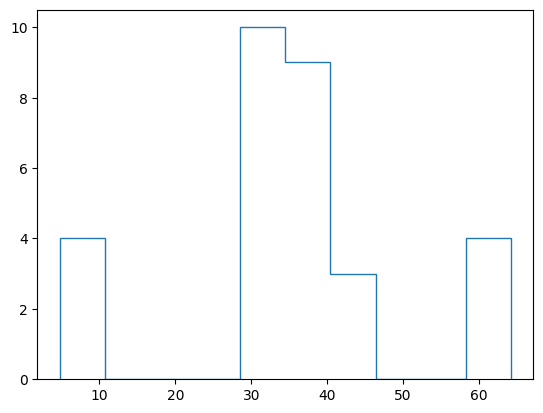

In [33]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform, cdist
import pandas as pd
import matplotlib.pyplot as plt

def analyze_clusters(data, n_clusters=30):
    """
    Perform k-means clustering and analyze cluster properties
    
    Parameters:
    data: numpy array of shape (n_samples, n_features)
    n_clusters: number of clusters (default=30)
    
    Returns:
    cluster_diameters: array of cluster diameters
    inter_cluster_distances: matrix of distances between cluster centers
    labels: cluster labels for each data point
    cluster_centers: coordinates of cluster centers
    """
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate cluster diameters
    cluster_diameters = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            # Calculate pairwise distances within cluster
            distances = pdist(cluster_points)
            cluster_diameters[i] = np.max(distances)
        else:
            cluster_diameters[i] = 0
    
    # Calculate distances between cluster centers
    inter_cluster_distances = cdist(cluster_centers, cluster_centers)
    
    return cluster_diameters, inter_cluster_distances, labels, cluster_centers

def format_results(cluster_diameters, inter_cluster_distances):
    """
    Format the clustering results into easily readable DataFrames
    
    Parameters:
    cluster_diameters: array of cluster diameters
    inter_cluster_distances: matrix of distances between cluster centers
    
    Returns:
    diameter_df: DataFrame of cluster diameters
    distances_df: DataFrame of inter-cluster distances
    """
    # Format cluster diameters
    diameter_df = pd.DataFrame({
        'Cluster': range(len(cluster_diameters)),
        'Diameter': cluster_diameters
    })
    
    # Format inter-cluster distances
    distances_df = pd.DataFrame(
        inter_cluster_distances,
        columns=[f'Cluster {i}' for i in range(len(inter_cluster_distances))],
        index=[f'Cluster {i}' for i in range(len(inter_cluster_distances))]
    )
    
    return cluster_diameters, inter_cluster_distances

# Example usage
if __name__ == "__main__":
    # Generate sample data
    data = pd.read_csv('data/optimize/config/SS-X.csv')
    data = data.drop(columns = ['Compile-performance-','Fixed-compile-cpu-']).values
    
    # Perform clustering analysis
    diameters, distances, labels, centers = analyze_clusters(data)
    
    # Format results
    diameter_df, distances_df = format_results(diameters, distances)
    
    # Print results
    print("Cluster Diameters:")
    #print(diameter_df)
    counts, bins = np.histogram(diameter_df)
    plt.stairs(counts, bins)
    plt.show
    # print("\nInter-cluster Distances:")
    # print(distances_df)